In [1]:
#import nmresearch as nmr
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [5]:
# decent color schemes for plots and such

colors=["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2", "#e1a692", "#de6e56", "#e14b31", "#c23728"]

colors_single = ['#fff5eb','#fee6ce','#fdd0a2','#fdae6b','#fd8d3c','#f16913','#d94801','#a63603','#7f2704']
colors_single.reverse()
zcorr_str = r"$\langle$ $\hat{S}_z (nT)$ $\hat{S}_z$ $\rangle$ (a.u.)"
xcorr_str = r"$\langle$ $\hat{S}_x (nT)$ $\hat{S}_x$ $\rangle$ (a.u.)"
mucorr_str = r"$\langle$ $\hat{S}_\mu (nT)$ $\hat{S}_\mu$ $\rangle$ (a.u.)"

plt.rcParams.update({'font.size': 14})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

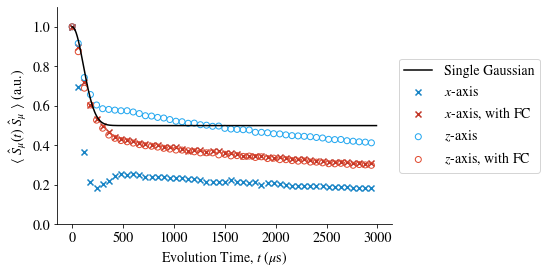

In [6]:
# 1.02 us pulse length

try:
    mrevXZ_zz = pickle.load(open("mrevXZ_zz.dat", "rb"))
except (OSError, IOError) as e:
    mrevXZ_zz = nmr.Experiment(183).load_tpc()
    with open('mrevXZ_zz.dat', 'wb') as fi:
        pickle.dump(mrevXZ_zz, fi)
        
try:
    mrevXZ_xx = pickle.load(open("mrevXZ_xx.dat", "rb"))
except (OSError, IOError) as e:
    mrevXZ_xx = nmr.Experiment(184).load_tpc()
    with open('mrevXZ_xx.dat', 'wb') as fi:
        pickle.dump(mrevXZ_xx, fi)
        
try:
    mrevXZ_zz_fc = pickle.load(open("mrevXZ_zz_fc.dat", "rb"))
except (OSError, IOError) as e:
    mrevXZ_zz_fc = nmr.Experiment(185).load_tpc()
    with open('mrevXZ_zz_fc.dat', 'wb') as fi:
        pickle.dump(mrevXZ_zz_fc, fi)
        
try:
    mrevXZ_xx_fc = pickle.load(open("mrevXZ_xx_fc.dat", "rb"))
except (OSError, IOError) as e:
    mrevXZ_xx_fc = nmr.Experiment(186).load_tpc()
    with open('mrevXZ_xx_fc.dat', 'wb') as fi:
        pickle.dump(mrevXZ_xx_fc, fi)
        
# (J^(FP) = 0.5 * 6.069 krad/s. 

h = (np.pi) *6.069 * 10**-3 # from single gaussian fit in cell below
t = np.arange(0,60*50, 60)
tsmooth = np.arange(0,60*50, 10)
plt.plot(tsmooth,1/2+1/2*np.exp(-(h*tsmooth/3)**2),label="Single Gaussian",color="black")

plt.scatter(t,mrevXZ_xx,label=r"$x$-axis",color=colors[0],marker='x')
plt.scatter(t,mrevXZ_xx_fc, label=r"$x$-axis, with FC",color=colors[-1],marker='x')

plt.scatter(t,mrevXZ_zz,label=r"$z$-axis",color=colors[1],marker="o", facecolors='none')
plt.scatter(t,mrevXZ_zz_fc, label=r"$z$-axis, with FC",color=colors[-2],marker="o", facecolors='none')

plt.ylim([0,1.1])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(r"Evolution Time, $t$ ($\mu$s)")
plt.ylabel(r"$\langle$ $\hat{S}_\mu (t)$ $\hat{S}_\mu$ $\rangle$ (a.u.)")
plt.savefig("mrev_coincidence.pdf",format='pdf',dpi=900,bbox_inches='tight')
plt.show()